In [ ]:
# Mount Google Drive in Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

#read the Clustering Data csv file
data = pd.read_csv('/content/drive/MyDrive/Clustering Data.csv')

In [ ]:
from google.colab.data_table import DataTable
DataTable.max_columns = 100

In [ ]:
data.head()

uid PNRLocatorID   avg_amt  \
0  504554455244696420493F7C2067657420746869732072...       AADMLF  0.019524   
1  46495853454E44696420493F7C20676574207468697320...       AAFBOM  0.081774   
2  534355545444696420493F7C2067657420746869732072...       AAFILI  0.026650   
3  534355545444696420493F7C2067657420746869732072...       AAFILI  0.026650   
4  44554D4D414E4E44696420493F7C206765742074686973...       AAFRQI  0.000000   

   round_trip  group_size  group  days_pre_booked  BookingChannel_Other  \
0           0       0.000      0         0.029703                     0   
1           1       0.000      0         0.039604                     0   
2           0       0.125      1         0.069307                     0   
3           0       0.125      1         0.069307                     0   
4           1       0.000      0         0.035361                     0   

   BookingChannel_Outside_Booking  BookingChannel_Reservations_Booking  ...  \
0                               1                                    0  ...   
1                               0                                    0  ...   
2                               0                                    0  ...   
3                               0                                    0  ...   
4                               1                                    0  ...   

   true_destination_dest_SXM  true_destination_dest_TPA  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   true_destination_dest_ZIH  UflyMemberStatus_Elite  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   

   UflyMemberStatus_non-ufly  UflyMemberStatus_Standard  seasonality_Q1  \
0                          0                          1               0   
1                          0                          1               0   
2                          1                          0               1   
3                          1                          0               1   
4                          1                          0               0   

   seasonality_Q2  seasonality_Q3  seasonality_Q4  
0               0               0               1  
1               0               1               0  
2               0               0               0  
3               0               0               0  
4               0               0               1  

[5 rows x 90 columns]

In [ ]:
clustering_data = data.copy()
clustering_data = clustering_data.drop(['uid','PNRLocatorID'],axis =1)

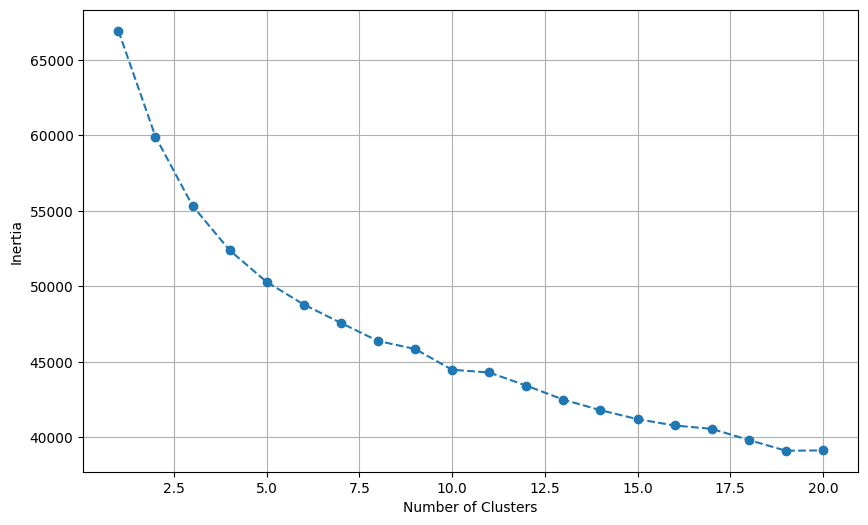

In [ ]:
#find the optimum number of cluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
cluster_range = range(1,21)

for cluster_num in cluster_range:
  kmeans = KMeans(n_clusters=cluster_num,n_init = 10, random_state = 24)
  kmeans.fit(clustering_data)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(cluster_range,inertia,marker='o', linestyle ='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)

In [ ]:
#Applying KMeans
kmeans = KMeans(n_clusters = 5,n_init=30)
kmeans.fit(clustering_data)

data['Cluster'] = kmeans.labels_
data.head(10000)

uid PNRLocatorID  \
0     504554455244696420493F7C2067657420746869732072...       AADMLF   
1     46495853454E44696420493F7C20676574207468697320...       AAFBOM   
2     534355545444696420493F7C2067657420746869732072...       AAFILI   
3     534355545444696420493F7C2067657420746869732072...       AAFILI   
4     44554D4D414E4E44696420493F7C206765742074686973...       AAFRQI   
...                                                 ...          ...   
9995  465241484D44696420493F7C2067657420746869732072...       OVDEVE   
9996  5649434B45525944696420493F7C206765742074686973...       OVDVCT   
9997  535445504B4144696420493F7C20676574207468697320...       OVGARJ   
9998  4B4F53544B4F44696420493F7C20676574207468697320...       OVGBHE   
9999  59414244696420493F7C20676574207468697320726967...       OVGBHE   

       avg_amt  round_trip  group_size  group  days_pre_booked  \
0     0.019524           0       0.000      0         0.029703   
1     0.081774           1       0.000      0         0.039604   
2     0.026650           0       0.125      1         0.069307   
3     0.026650           0       0.125      1         0.069307   
4     0.000000           1       0.000      0         0.035361   
...        ...         ...         ...    ...              ...   
9995  0.042032           0       0.125      1         0.036775   
9996  0.049705           0       0.000      0         0.028289   
9997  0.012305           1       0.000      0         0.019802   
9998  0.067609           1       0.125      1         0.125884   
9999  0.067609           1       0.125      1         0.125884   

      BookingChannel_Other  BookingChannel_Outside_Booking  \
0                        0                               1   
1                        0                               0   
2                        0                               0   
3                        0                               0   
4                        0                               1   
...                    ...                             ...   
9995                     0                               0   
9996                     0                               1   
9997                     0                               1   
9998                     0                               1   
9999                     0                               1   

      BookingChannel_Reservations_Booking  ...  true_destination_dest_TPA  \
0                                       0  ...                          0   
1                                       0  ...                          0   
2                                       0  ...                          0   
3                                       0  ...                          0   
4                                       0  ...                          0   
...                                   ...  ...                        ...   
9995                                    0  ...                          0   
9996                                    0  ...                          0   
9997                                    0  ...                          0   
9998                                    0  ...                          0   
9999                                    0  ...                          0   

      true_destination_dest_ZIH  UflyMemberStatus_Elite  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   
...                         ...                     ...   
9995                          0                       0   
9996                          0                       0   
9997                          0                       0   
9998                          0                       0   
9999                          0                       0   

      UflyMembe

In [ ]:
#sort and count for each number of cluster
cluster_size = data['Cluster'].value_counts().sort_index()
cluster_size

Cluster
0    2441
1    2351
2    4127
3    2387
4    3838
Name: count, dtype: int64

In [ ]:
reservation_data = pd.read_csv('/content/drive/MyDrive/sample_data_transformed.csv')

<ipython-input-12-88947073aa29>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  reservation_data = pd.read_csv('/content/drive/MyDrive/sample_data_transformed.csv')


In [ ]:
#Merge sample_data_transformed and cluster data
final_dataframe = reservation_data.merge(data[['uid', 'Cluster']], on='uid', how='left')

In [ ]:
final_dataframe.head()

Unnamed: 0 PNRLocatorID PaxName     TicketNum  CouponSeqNbr  \
0           1       AADMLF  PETEJO  3.377490e+12             1   
1           2       AAFBOM  FIXSMO  3.372110e+12             2   
2           3       AAFBOM  FIXSMO  3.372110e+12             1   
3           4       AAFILI  SCUTKA  3.372110e+12             2   
4           5       AAFILI  SCUTKA  3.372110e+12             1   

  ServiceStartCity ServiceEndCity PNRCreateDate ServiceStartDate  \
0              MSP            DFW       9/15/14          10/6/14   
1              JFK            MSP       7/22/14          8/19/14   
2              MSP            JFK       7/22/14          8/14/14   
3              MSP            SEA        2/6/14          3/27/14   
4              LAN            MSP        2/6/14          3/27/14   

                                       EncryptedName  ... age_group  \
0  504554455244696420493F7C2067657420746869732072...  ...       55+   
1  46495853454E44696420493F7C20676574207468697320...  ...     35-54   
2  46495853454E44696420493F7C20676574207468697320...  ...     35-54   
3  534355545444696420493F7C2067657420746869732072...  ...     25-34   
4  534355545444696420493F7C2067657420746869732072...  ...     25-34   

   true_origins  final_destination round_trip group_size group seasonality  \
0           MSP                DFW          0          1     0          Q4   
1           MSP                MSP          1          1     0          Q3   
2           MSP                MSP          1          1     0          Q3   
3           LAN                SEA          0          2     1          Q1   
4           LAN                SEA          0          2     1          Q1   

   days_pre_booked  true_destination  Cluster  
0               21               DFW        3  
1               28               JFK        3  
2               23               JFK        3  
3               49               MSP        1  
4               49               MSP        1  

[5 rows x 38 columns]

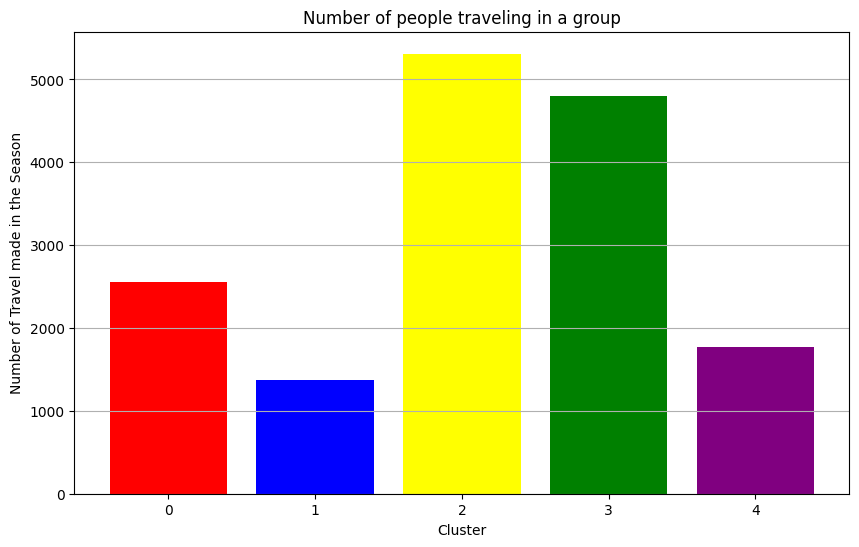

In [ ]:
#Template Code for Visualization
cluster_color = {
    0: 'red',
    1: 'blue',
    2: 'yellow',
    3: 'green',
    4: 'purple'
}
cluster_season = final_dataframe.groupby('Cluster')['group'].sum()

plt.figure(figsize=(10,6))
for cluster in range(len(cluster_season)):
  plt.bar(cluster,cluster_season[cluster],color = cluster_color[cluster])

plt.title('Number of people traveling in a group')
plt.xlabel('Cluster')
plt.ylabel('Number of Travel made in the Season')
plt.xticks(ticks = range(len(cluster_season)))
plt.grid(axis='y')
plt.show()

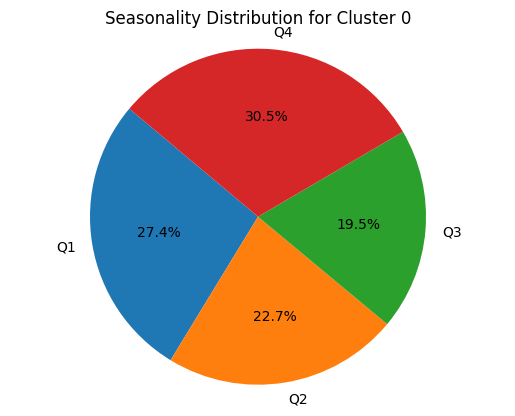

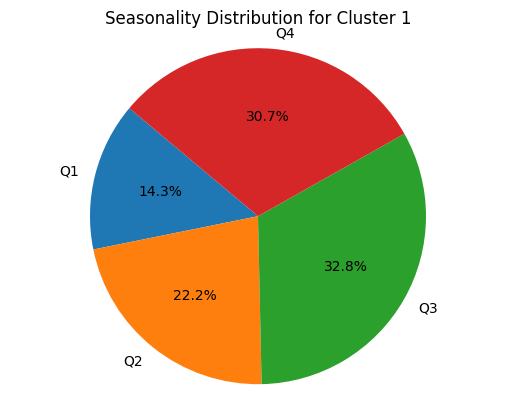

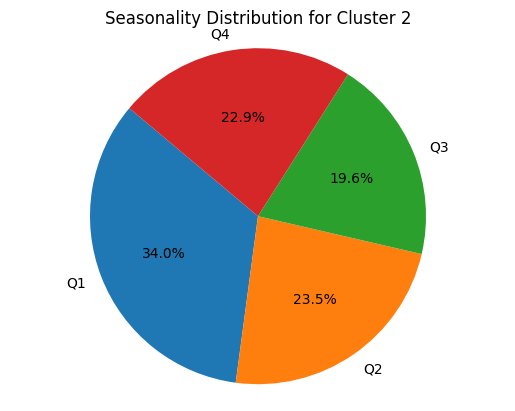

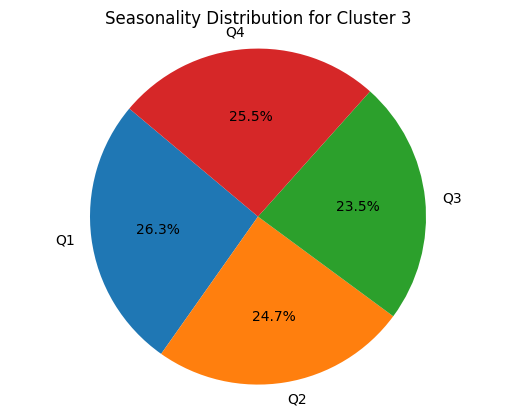

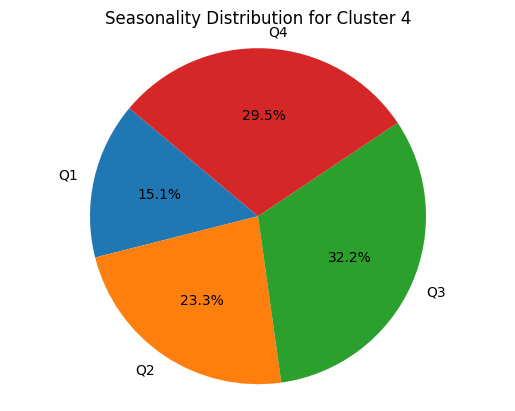

In [ ]:
cluster_seasonality_counts = final_dataframe.groupby('Cluster')['seasonality'].value_counts().unstack().fillna(0)

# Pie charts for seasonality
for cluster in cluster_seasonality_counts.index:
    season_counts = cluster_seasonality_counts.loc[cluster]
    plt.figure()
    plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Seasonality Distribution for Cluster {cluster}')
    plt.show()

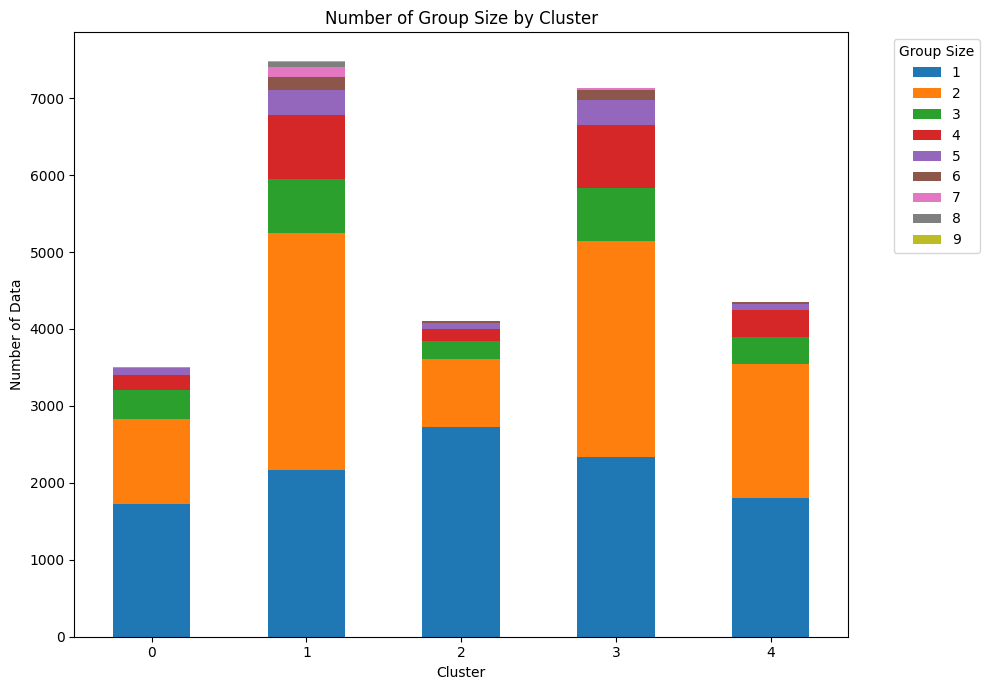

In [ ]:
# Count the number of people traveling in a group by cluster

#group_travelers = final_dataframe[final_dataframe['group_size'] > 1]
#cluster_group_size = group_travelers.groupby('Cluster')['group_size'].count().reset_index()

#plt.figure(figsize=(10,6))

#for cluster in range(len(cluster_group_size)):
#  plt.bar(cluster,cluster_season[cluster],color = cluster_color[cluster])

#plt.title('Number of People Traveling in a Group by Cluster')
#plt.xlabel('Cluster')
#plt.ylabel('Number of People Traveling in a Group')
#plt.grid(axis='y')
#plt.show()

cluster_group_size = final_dataframe.groupby('Cluster')['group_size'].value_counts()

pivot_data = cluster_group_size.unstack().fillna(0)

pivot_data.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Number of Group Size by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Data')
plt.xticks(rotation=0)
plt.legend(title='Group Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
most_group_size = final_dataframe.groupby('Cluster')['group_size'].mean()

print(most_group_size)

Cluster
0    1.906293
1    1.549622
2    2.393798
3    2.229292
4    1.826769
Name: group_size, dtype: float64


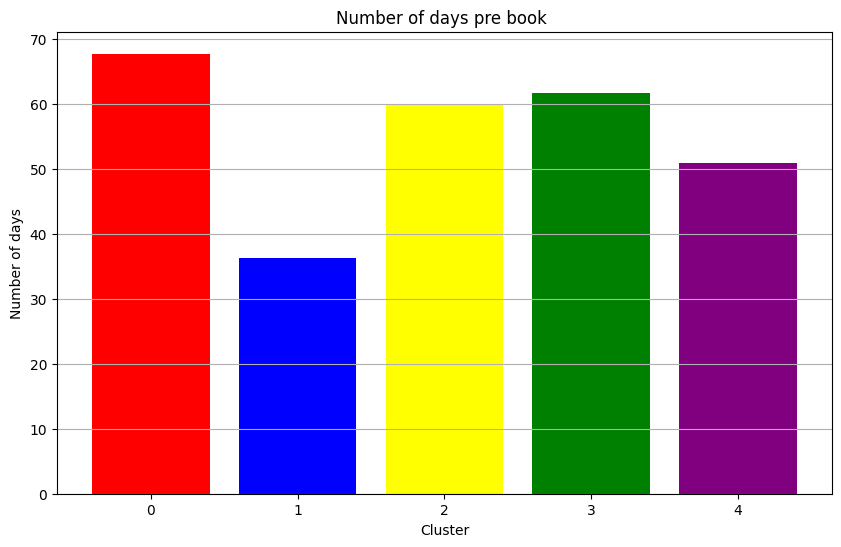

In [ ]:
#Days_pre_book by mean
cluster_days_pre_book = final_dataframe.groupby('Cluster')['days_pre_booked'].mean()

plt.figure(figsize=(10,6))

for cluster in cluster_days_pre_book.index:
  plt.bar(cluster,cluster_days_pre_book[cluster],color = cluster_color[cluster])

plt.title('Number of days pre book ')
plt.xlabel('Cluster')
plt.ylabel('Number of days')
plt.grid(axis='y')
plt.show()


In [ ]:
# Group the dataframe by 'Cluster' and calculate the mean of 'days_pre_booked' for each cluster
mean_days_pre_book = final_dataframe.groupby('Cluster')['days_pre_booked'].mean()

# Print the mean number of days pre-booked for each cluster
print(mean_days_pre_book)


Cluster
0    67.770326
1    36.250914
2    60.062692
3    61.768605
4    51.006279
Name: days_pre_booked, dtype: float64


<ipython-input-27-3d4546fad4dd>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


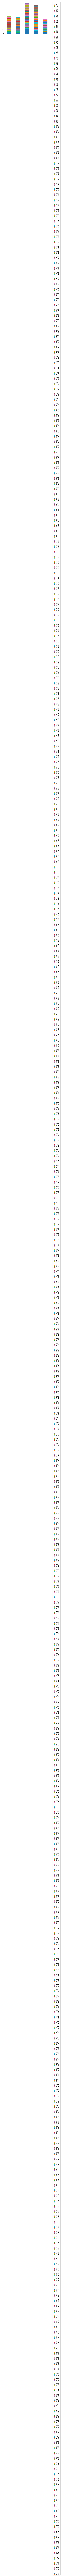

In [ ]:
cluster_BaseFareAmt = final_dataframe.groupby('Cluster')['BaseFareAmt'].value_counts()

pivot_data = cluster_BaseFareAmt.unstack().fillna(0)

pivot_data.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Amount of Base Fare by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Data')
plt.xticks(rotation=0)
plt.legend(title='Base Fare Amount', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


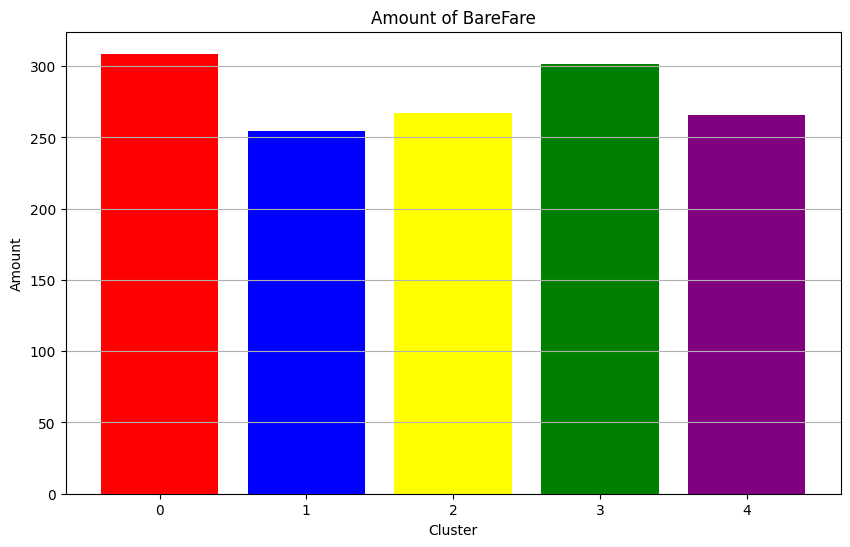

In [ ]:
#BaseFareAmt by mean
cluster_BaseFareAmt_counts = final_dataframe.groupby('Cluster')['BaseFareAmt'].mean()

plt.figure(figsize=(10,6))

for cluster in range(len(cluster_BaseFareAmt_counts)):
  plt.bar(cluster,cluster_BaseFareAmt_counts[cluster],color = cluster_color[cluster])

plt.title('Amount of BareFare')
plt.xlabel('Cluster')
plt.ylabel('Amount')
plt.grid(axis='y')
plt.show()

<ipython-input-30-c9490ddbcf94>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


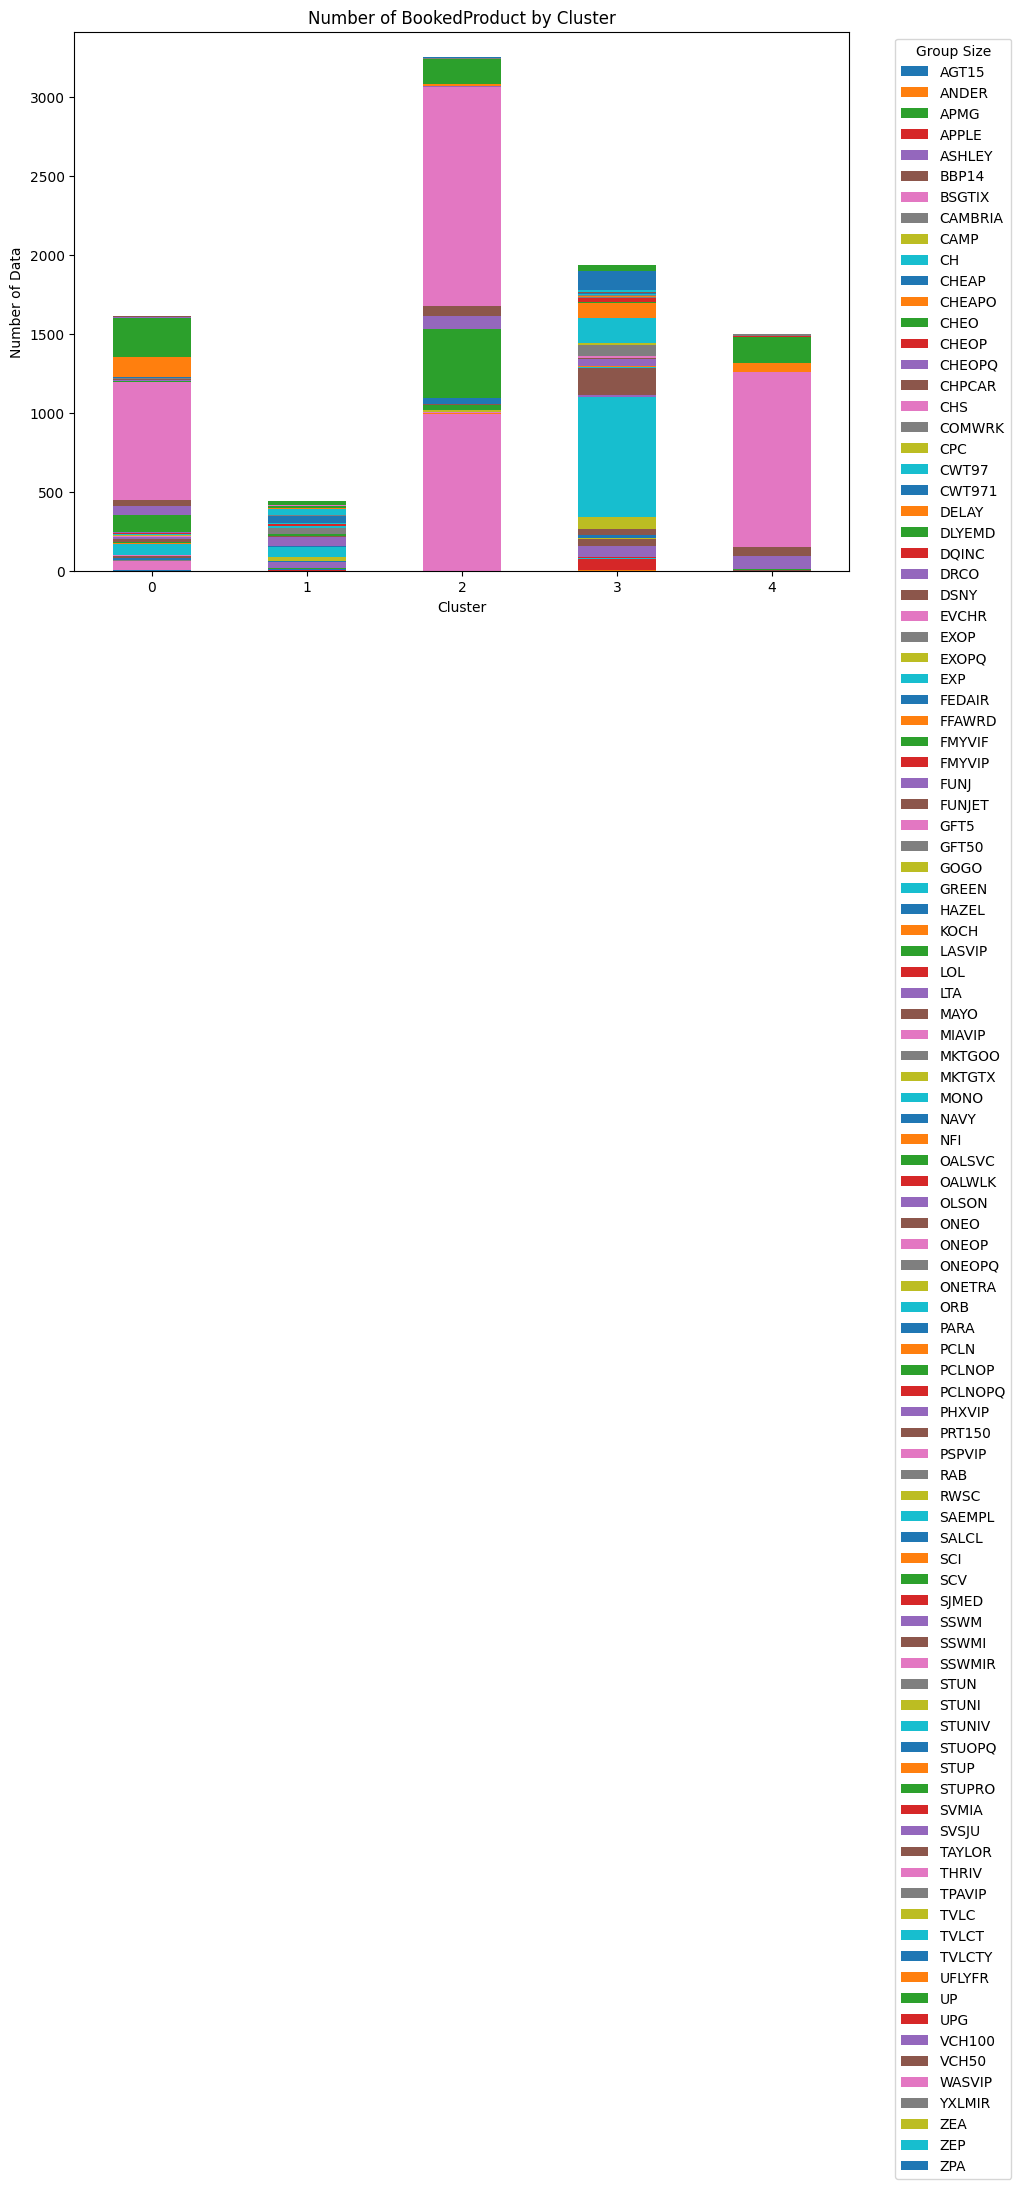

In [ ]:
cluster_BookedProduct = final_dataframe.groupby('Cluster')['BookedProduct'].value_counts()

pivot_data = cluster_BookedProduct.unstack().fillna(0)

pivot_data.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Number of BookedProduct by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Data')
plt.xticks(rotation=0)
plt.legend(title='Group Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Main Booked Product in Each Segment
mainproduct = final_dataframe.groupby(['Cluster', 'BookedProduct']).size().unstack(fill_value=0)
mainproduct = mainproduct.idxmax(axis=1)

print(mainproduct)

Cluster
0    SSWMIR
1       EXP
2    SSWMIR
3       EXP
4    SSWMIR
dtype: object


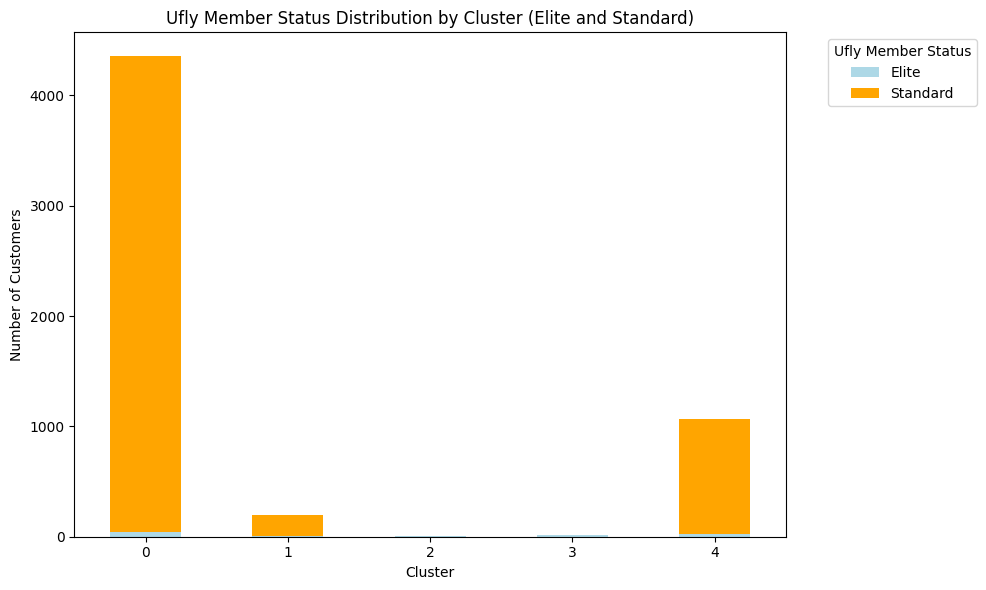

In [ ]:
filtered_status = final_dataframe[final_dataframe['UflyMemberStatus'].isin(['Elite', 'Standard'])]

ufly_status_by_cluster = filtered_status.groupby(['Cluster', 'UflyMemberStatus']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))

ufly_status_by_cluster.plot(kind='bar', stacked=True, ax=plt.gca(), color=['lightblue', 'orange'])

plt.title('Ufly Member Status Distribution by Cluster (Elite and Standard)')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Ufly Member Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

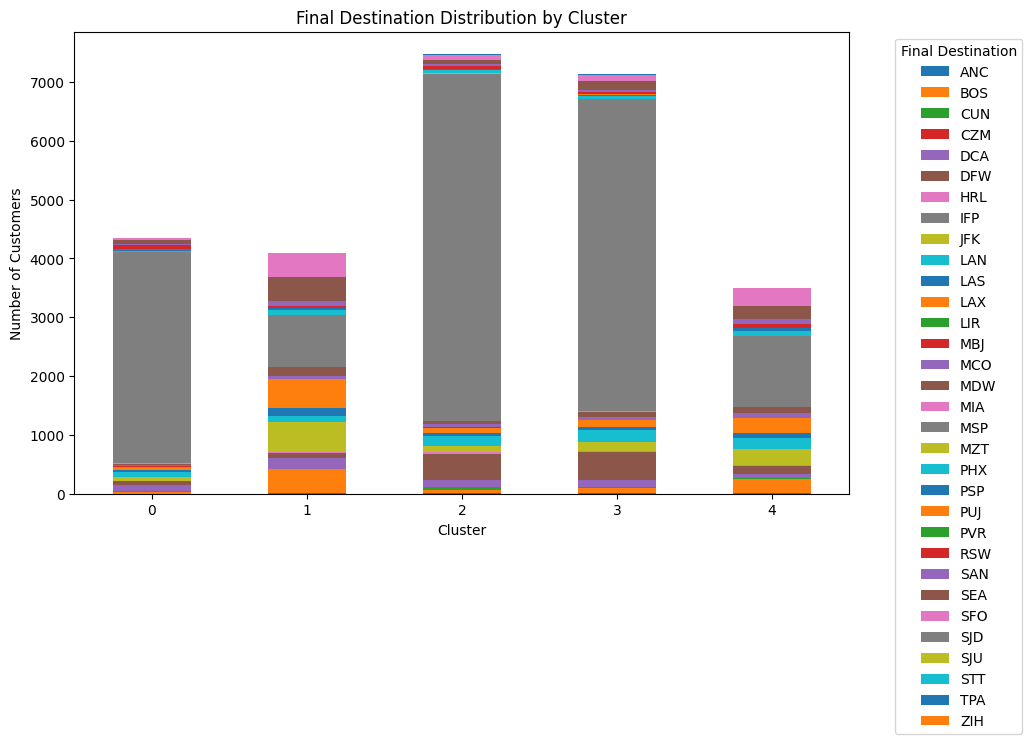

In [ ]:
destination_by_cluster = final_dataframe.groupby(['Cluster', 'final_destination']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))

destination_by_cluster.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Final Destination Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Final Destination', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Main Final Destination in Each Segment
maindestination = final_dataframe.groupby(['Cluster', 'final_destination']).size().unstack(fill_value=0)
maindestination = maindestination.idxmax(axis=1)

print(maindestination)

Cluster
0    MSP
1    MSP
2    MSP
3    MSP
4    MSP
dtype: object


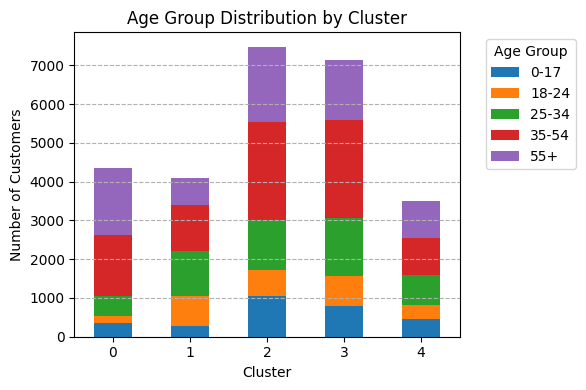

In [ ]:
# Segment's Information by Age Group Distribution
import matplotlib.pyplot as plt

age_group_distribution = final_dataframe.groupby(['Cluster', 'age_group']).size().unstack(fill_value=0)

plt.figure(figsize=(6, 4))

age_group_distribution.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Age Group Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()


In [ ]:
# Largest Age Group in Each Segment
defining_age_group = final_dataframe.groupby(['Cluster', 'age_group']).size().unstack(fill_value=0)
defining_age_group = defining_age_group.idxmax(axis=1)

print(defining_age_group)

Cluster
0      55+
1    25-34
2    35-54
3    35-54
4      55+
dtype: object


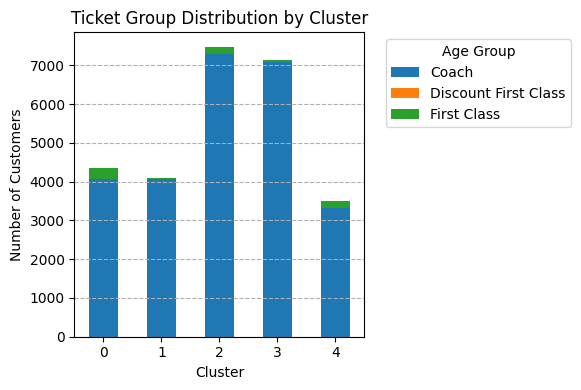

In [ ]:
# Visualization of What class of service (coach, first class, etc) the passenger booked
import matplotlib.pyplot as plt

age_group_distribution = final_dataframe.groupby(['Cluster', 'BkdClassOfService']).size().unstack(fill_value=0)

plt.figure(figsize=(6, 4))

age_group_distribution.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Ticket Group Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Fare Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

# Mostly all the segments are just Coach!

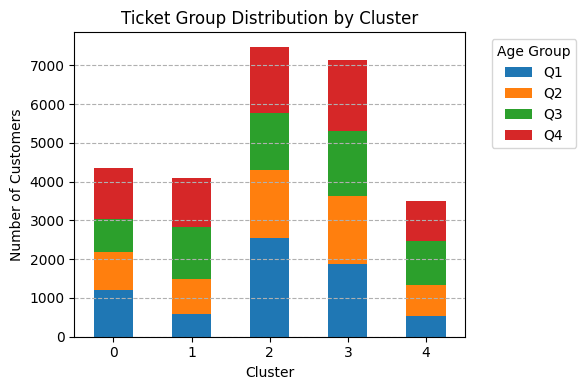

In [ ]:
# Visualization of seasonality within each segment
import matplotlib.pyplot as plt

age_group_distribution = final_dataframe.groupby(['Cluster', 'seasonality']).size().unstack(fill_value=0)

plt.figure(figsize=(6, 4))

age_group_distribution.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Ticket Group Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Quarter Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()


In [ ]:
# Most Popular Quarter in Each Segment
popularquarter = final_dataframe.groupby(['Cluster', 'seasonality']).size().unstack(fill_value=0)
popularquarter = popularquarter.idxmax(axis=1)


print(popularquarter)

Cluster
0    Q4
1    Q3
2    Q1
3    Q1
4    Q3
dtype: object


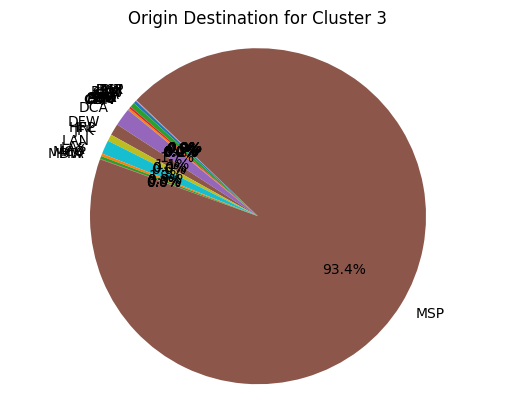

In [ ]:
# Segment 3 Information

cluster_origin_counts = final_dataframe.groupby('Cluster')['true_origins'].value_counts().unstack().fillna(0)

# Pie charts for strating airport

origin_counts = cluster_origin_counts.loc[3]
plt.figure()
plt.pie(origin_counts, labels=origin_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title(f'Origin Destination for Cluster 3')
plt.show()


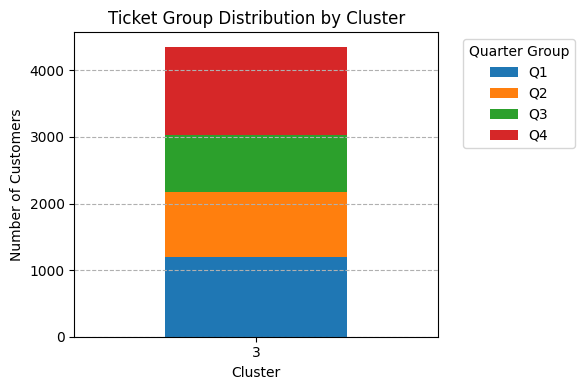

In [ ]:
# Visualization of seasonality within Cluster 3
import matplotlib.pyplot as plt

clusterspecific = final_dataframe[final_dataframe['Cluster'] == 3]

age_group_distribution = clusterspecific.groupby(['Cluster', 'seasonality']).size().unstack(fill_value=0)

plt.figure(figsize=(6, 4))

age_group_distribution.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Ticket Group Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Quarter Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()


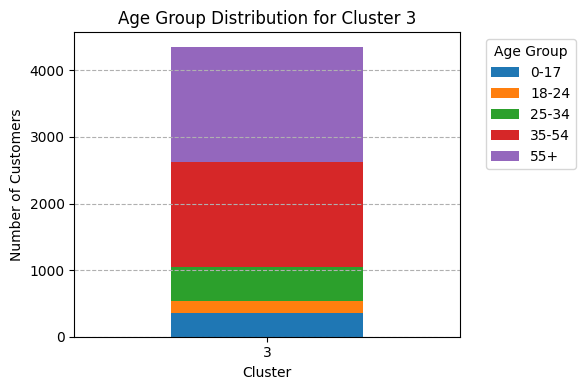

In [ ]:
# Segment 3's Information by Age Group Distribution
import matplotlib.pyplot as plt

clusterspecificage = final_dataframe[final_dataframe['Cluster'] == 3]


age_group_distribution = clusterspecificage.groupby(['Cluster', 'age_group']).size().unstack(fill_value=0)

plt.figure(figsize=(6, 4))

age_group_distribution.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Age Group Distribution for Cluster 3')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()


<ipython-input-27-2b2542f1d296>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_status = clusterspecificstatus[final_dataframe['UflyMemberStatus'].isin(['Elite', 'Standard'])]


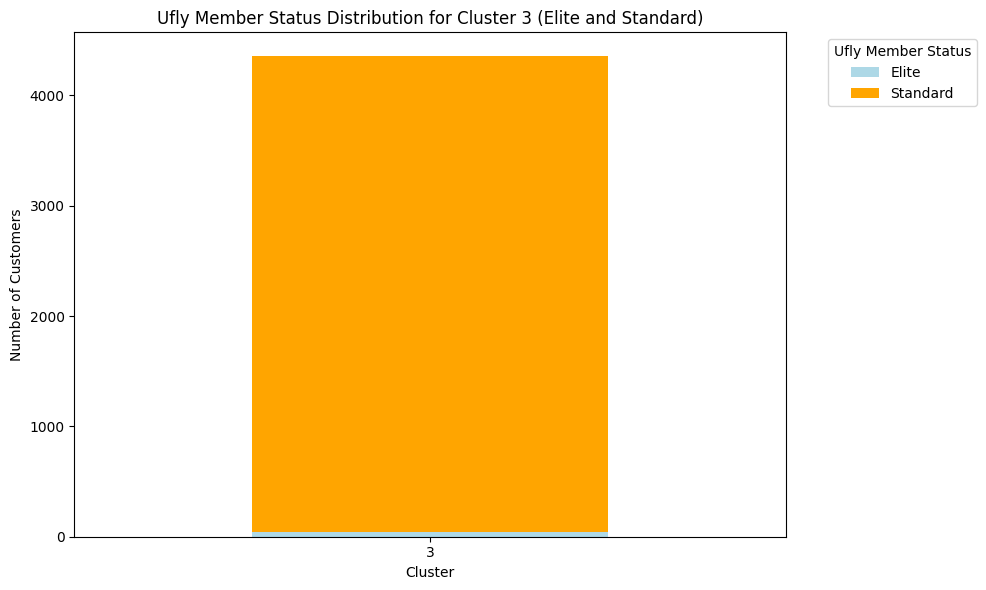

In [ ]:
# Cluster 3 Membership Status

new_var = final_dataframe[final_dataframe['Cluster'] == 3]

clusterspecificstatus = new_var

filtered_status = clusterspecificstatus[final_dataframe['UflyMemberStatus'].isin(['Elite', 'Standard'])]

ufly_status_by_cluster = filtered_status.groupby(['Cluster', 'UflyMemberStatus']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))

ufly_status_by_cluster.plot(kind='bar', stacked=True, ax=plt.gca(), color=['lightblue', 'orange'])

plt.title('Ufly Member Status Distribution for Cluster 3 (Elite and Standard)')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Ufly Member Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()